In [1]:
#install
from pynwb import NWBHDF5IO
import matplotlib.pyplot as plt
from bisect import bisect
import plotly.graph_objects as go
import numpy as np
nwbfileloc = r'C:\Users\Saksham\Documents\NWB\shenoy\data\centerOut\Jenkins\3Ring\2016-01-28 (1)\2016-01-28 (1)_nwb_v4.nwb'
nwbfile_io = NWBHDF5IO(nwbfileloc,'r')
nwbfile = nwbfile_io.read()

In [2]:
#specify a sample trial no:
sample_trial_no = 5 #pick a trial no

# extract epoc times from nwb files:
trials = nwbfile.trials
start_time = trials['start_time']
stop_time = trials['stop_time']
go_cue_time = trials['go_cue_time']
reach_time = trials['reach_time']
target_acquire_time = trials['target_acquire_time']

#extract behavior time series: 
cursor_pos = nwbfile.processing['behavior'].data_interfaces['Position']['Cursor']

#extract spike times for the given trial:
spike_times = nwbfile.units['spike_times'][sample_trial_no]

#slice by trial start and stop times:
#cursor position:
target_position = nwbfile.trials['target_pos'][sample_trial_no]
cursor_pos_start = start_time[sample_trial_no]
cursor_pos_stop = stop_time[sample_trial_no]
cursor_idx_start = bisect(cursor_pos.timestamps, cursor_pos_start)
cursor_idx_stop = bisect(cursor_pos.timestamps, cursor_pos_stop, lo=cursor_idx_start)

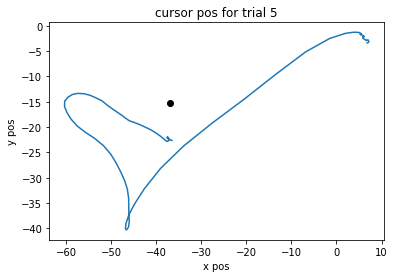

In [3]:
#plot cursor position for the given trial no:
plt.plot(cursor_pos.data[cursor_idx_start:cursor_idx_stop,0],cursor_pos.data[cursor_idx_start:cursor_idx_stop,1])
plt.plot(target_position[0],target_position[1],'ko')
plt.title(f'cursor pos for trial {sample_trial_no}')
plt.xlabel('x pos')
plt.ylabel('y pos')
plt.show()

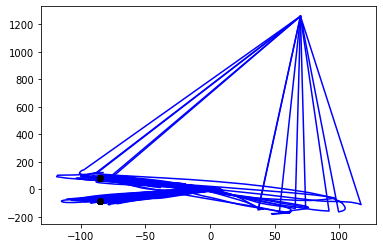

In [7]:
#plotting cursor positions for all trials to visualize reaches for the given target positions:
target_position_x = [nwbfile.trials['target_pos'][trl][0] for trl in range(len(nwbfile.trials))]
unique_target_pos = np.unique(target_position_x)
pick_target_pos = unique_target_pos[2] # specify a target position
trials_nos_loop = np.where(target_position_x==pick_target_pos)[0]
for trial_no in trials_nos_loop:
    target_position = nwbfile.trials['target_pos'][trial_no]
    cursor_pos_start = start_time[trial_no]
    cursor_pos_stop = stop_time[trial_no]
    cursor_idx_start = bisect(cursor_pos.timestamps, cursor_pos_start)
    cursor_idx_stop = bisect(cursor_pos.timestamps, cursor_pos_stop, lo=cursor_idx_start)
    plt.plot(cursor_pos.data[cursor_idx_start:cursor_idx_stop,0],cursor_pos.data[cursor_idx_start:cursor_idx_stop,1],'b-')
    plt.plot(target_position[0],target_position[1],'ko')
plt.show()

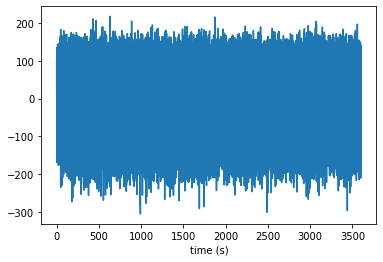

In [6]:
#retrieving some lfp traces each for the M1/PMd array and for data segment 1 and 2:
lfp_m1_1 = nwbfile.processing['ecephys'].data_interfaces['LFP']['M1_1'] #corresponding to array A and segment 1
lfp_pmd_1 = nwbfile.processing['ecephys'].data_interfaces['LFP']['PMd_1']

len_trace = lfp_m1_1.data.shape[0]
plot_channel_trace = 2
plt.plot(np.arange(0,len_trace)/lfp_m1_1.rate, lfp_m1_1.data[:,plot_channel_trace])
plt.xlabel('time (s)')
plt.show()